<a href="https://colab.research.google.com/github/MaschinenNah/MachineLearningKochbuch02_Generatoren/blob/main/04_BilderLadenSW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dieses Beispiel ist identisch zu [Dateien laden](https://colab.research.google.com/drive/1oGo4j3oGSKbrg-krFjMvcZa9RV0YTdmN?usp=sharing) - lädt aber Graustufenbilder statt RGB:

In [1]:
!git clone https://github.com/MaschinenNah/ml_utils
from ml_utils import load
from ml_utils import convert
from ml_utils import show

Cloning into 'ml_utils'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 121 (delta 56), reused 85 (delta 27), pack-reused 0
Receiving objects: 100% (121/121), 14.38 KiB | 7.19 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [2]:
zip_url = "http://pitnoack.de/mn/generator_bilder_laden/data.zip"
load.load_and_unzip_from_url(zip_url)

In [3]:
from tensorflow.keras.utils import Sequence
import numpy as np
from PIL import Image
import os
import random

class ImageGenerator(Sequence):

  def __init__(self, dir_, shape, batch_size=25):
    filenames = os.listdir(dir_)
    self.len = int(len(filenames)/batch_size)
    self.shape = shape
    self.batch_size = batch_size
    self.file_paths = load.all_abs_paths_in_dir(dir_)
    random.shuffle(self.file_paths)

  def __len__(self):
    return self.len

  def __getitem__(self, index):
    if index >= self.len:
      raise IndexError("list index out of range")
    else:
      file_paths = self.file_paths[index*self.batch_size:(index+1)*self.batch_size]
      batch_x = np.empty((self.batch_size,) + (self.shape), "float32")
      for idx, file_path in enumerate(file_paths):
        img_as_array = load.img_path_to_np_array(file_path)
        img_gray = convert.rgb_to_grayscale(img_as_array)
        batch_x[idx] = img_gray
      return batch_x, batch_x

In [4]:
train_dir = "/content/data/img_train"

train_gen = ImageGenerator(train_dir, (48, 48))

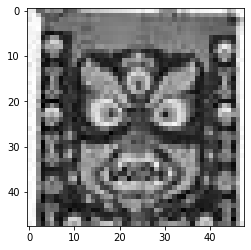

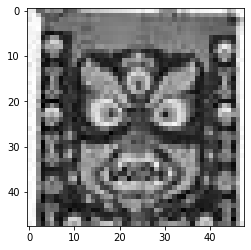

In [6]:
from matplotlib import pyplot as plt

img_x = train_gen[1][0][0]

plt.imshow(img_x, cmap="gray")
plt.show()

img_y = train_gen[1][1][0]
plt.imshow(img_y, cmap="gray")
plt.show()

In [7]:
import numpy as np

from tensorflow.keras.layers import Input, Flatten, Dense, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

shape = (48, 48)

input_layer = Input(shape=shape)

x = Flatten()(input_layer)

x = Dense(units=2304, activation='sigmoid')(x)

output_layer = Reshape(shape)(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 2304)              5310720   
_________________________________________________________________
reshape (Reshape)            (None, 48, 48)            0         
Total params: 5,310,720
Trainable params: 5,310,720
Non-trainable params: 0
_________________________________________________________________


In [9]:
optimizer = Adam(learning_rate=0.0005)

def loss(y_true, y_pred):
  return K.mean(K.square(y_true - y_pred), axis = [1,2])

model.compile(loss=loss, optimizer=optimizer)

In [10]:
model.fit(train_gen, epochs=50)

Epoch 1/50
100/100 [==============================] - 4s 36ms/step - loss: 0.0427
Epoch 2/50
100/100 [==============================] - 4s 38ms/step - loss: 0.0259
Epoch 3/50
100/100 [==============================] - 4s 37ms/step - loss: 0.0220
Epoch 4/50
100/100 [==============================] - 4s 38ms/step - loss: 0.0197
Epoch 5/50
100/100 [==============================] - 4s 37ms/step - loss: 0.0181
Epoch 6/50
100/100 [==============================] - 4s 36ms/step - loss: 0.0169
Epoch 7/50
100/100 [==============================] - 4s 36ms/step - loss: 0.0159
Epoch 8/50
100/100 [==============================] - 4s 35ms/step - loss: 0.0151
Epoch 9/50
100/100 [==============================] - 4s 35ms/step - loss: 0.0144
Epoch 10/50
100/100 [==============================] - 4s 36ms/step - loss: 0.0138
Epoch 11/50
 29/100 [=======>......................] - ETA: 2s - loss: 0.0136

KeyboardInterrupt: ignored

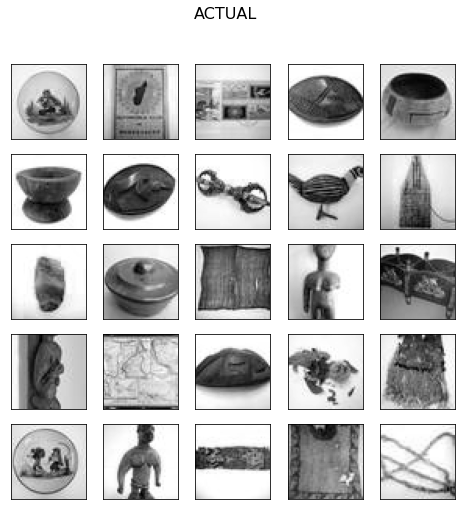

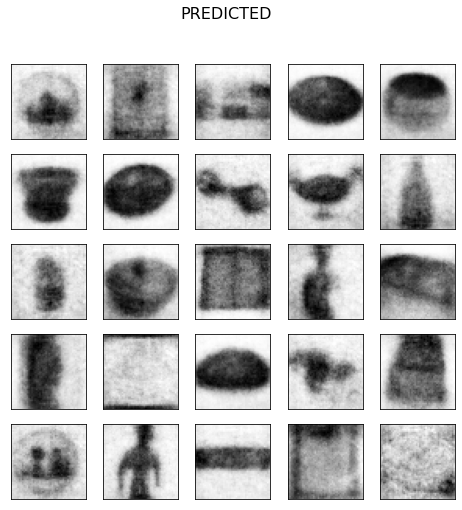

In [14]:
x = train_gen[3][0]
y = model.predict(x)



show.show_images_from_np_array(x, "ACTUAL")
show.show_images_from_np_array(y, "PREDICTED")

In [ ]:
# !zip -r /content/file.zip /content/data

TODO:

Zwei Beipsiele daraus machen (Version 2 mit Validierungs Generator)